In [49]:
from astroquery.gaia import Gaia
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [51]:
# Load the Gaia table
gaiadr3_table = Gaia.load_table('gaiadr3.gaia_source')

# Print the column names
for column in gaiadr3_table.columns:
    print(f"Column: {column.name}")
    print(f"Description: {column.description}")
    print()

Column: solution_id
Description: Solution Identifier

Column: designation
Description: Unique source designation (unique across all Data Releases)

Column: source_id
Description: Unique source identifier (unique within a particular Data Release)

Column: random_index
Description: Random index for use when selecting subsets

Column: ref_epoch
Description: Reference epoch

Column: ra
Description: Right ascension

Column: ra_error
Description: Standard error of right ascension

Column: dec
Description: Declination

Column: dec_error
Description: Standard error of declination

Column: parallax
Description: Parallax

Column: parallax_error
Description: Standard error of parallax

Column: parallax_over_error
Description: Parallax divided by its standard error

Column: pm
Description: Total proper motion

Column: pmra
Description: Proper motion in right ascension direction

Column: pmra_error
Description: Standard error of proper motion in right ascension direction

Column: pmdec
Description:

In [26]:

query = """
SELECT TOP 1000000 ra, dec, parallax, pmra, pmdec, phot_g_mean_mag,
bp_rp, phot_g_mean_mag+5*log10(parallax)-10 as mg, radial_velocity
FROM gaiadr3.gaia_source
WHERE parallax > 1.
"""

job = Gaia.launch_job(query)
results = job.get_results()
print(len(results))


638164


In [4]:

gdata = results.to_pandas()
print(gdata)

                ra        dec  parallax       pmra     pmdec  phot_g_mean_mag  \
0       274.416636 -21.319055  1.896151  -6.537800 -0.204295        20.330873   
1       302.615485 -18.896738  1.198711  -3.200111 -9.267362        18.484478   
2       302.618756 -18.890770  1.476347 -13.415397 -6.902121        16.785004   
3       302.594492 -18.902811  1.220471  -4.959003 -5.577459        20.054167   
4       273.113457 -21.909938  2.075234  -2.212278  1.363261        19.523180   
...            ...        ...       ...        ...       ...              ...   
786428  298.683330  29.154877  1.417000  -1.641154 -3.317582        19.863302   
786429  298.367184  28.518767  1.093617  -2.565608 -2.005326        20.516615   
786430  298.362246  28.513783  1.245006  -3.605714 -4.145670        20.603922   
786431  298.372731  28.509429  1.077651  10.002924 -1.183019        19.000059   
786432  298.566938  28.212797  1.368022  -0.949964 -2.096267        15.451203   

           bp_rp         mg

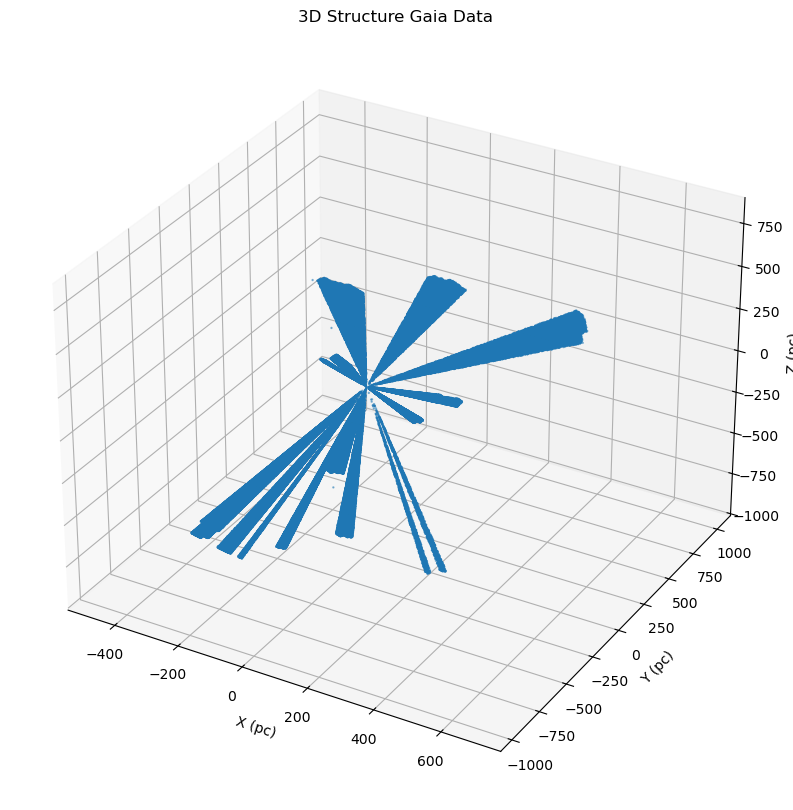

In [52]:


# Sample RA, Dec, and parallax arrays
ra = np.array(gdata['ra'])
dec = np.array(gdata['dec'])
parallax = np.array(gdata['parallax'])
bp_rp = np.array(gdata['bp_rp'])
mg = np.array(gdata['mg'])

# Convert parallax to distance (parsecs)
distance = 1000 / parallax

# Convert to Cartesian coordinates
x = distance * np.cos(np.radians(ra)) * np.cos(np.radians(dec))
y = distance * np.sin(np.radians(ra)) * np.cos(np.radians(dec))
z = distance * np.sin(np.radians(dec))

# Plot in 3D
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, s=0.5, alpha=0.5) 

ax.set_xlabel("X (pc)")
ax.set_ylabel("Y (pc)")
ax.set_zlabel("Z (pc)")
plt.title("3D Structure Gaia Data")
plt.show()


700327
Magnitude if G filter data in array mg, with length  700327
Mag in G_BP filter - Mag in G_RP filter in array bp_rp, with length  700327


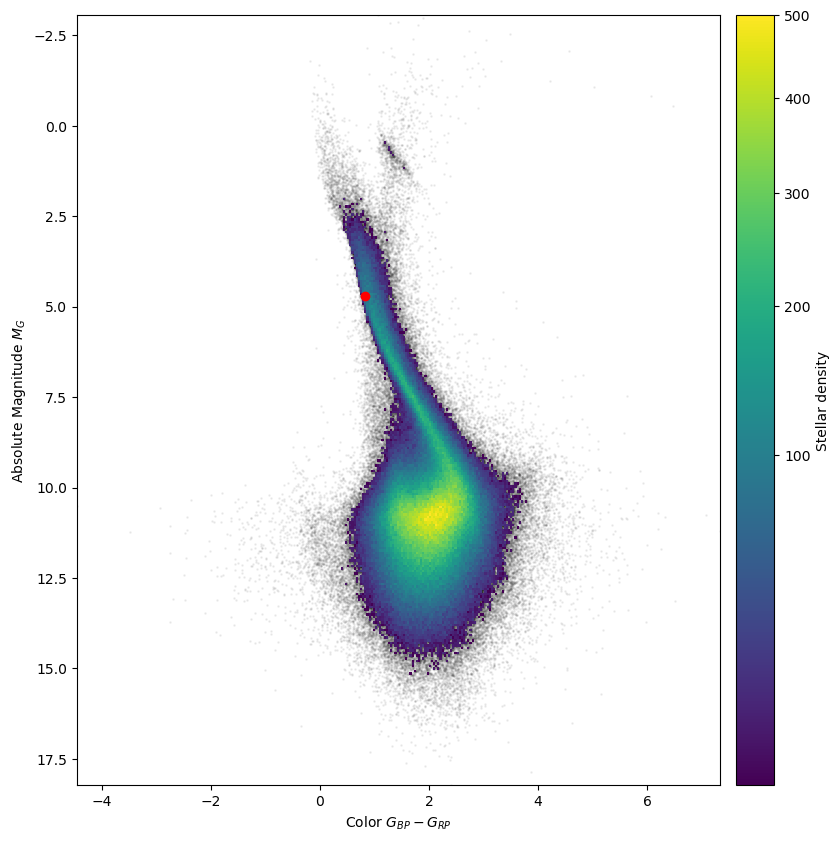

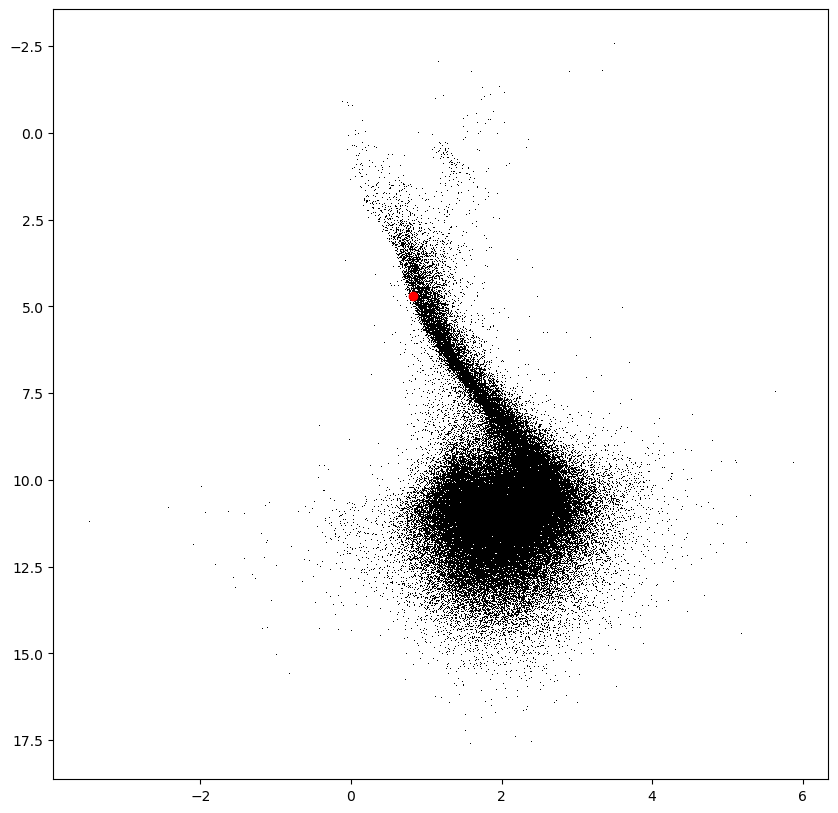

In [79]:

# plot the H-R diagram for 1 M stars within 200 pc from the Sun
from matplotlib import colors
bp_rp = np.array(gdata['bp_rp'])
mg = np.array(gdata['mg'])

# Remove NaN values
mask = ~np.isnan(bp_rp) & ~np.isnan(mg)
bp_rp = bp_rp[mask]
mg = mg[mask]

print(len(mg))
# Subsample the data with n_rand point:


print('Magnitude if G filter data in array mg, with length ',mg.size)
print('Mag in G_BP filter - Mag in G_RP filter in array bp_rp, with length ',bp_rp.size)


fig, ax = plt.subplots(figsize=(10, 10))
## only show 2D-histogram for bins with more than 10 stars in them
h = ax.hist2d(bp_rp[:-1], mg[:-1], bins=300, cmin=10, norm=colors.PowerNorm(0.5), zorder=0.5)

# fill the rest with scatter (set rasterized=True if saving as vector graphics)
ax.scatter(bp_rp, mg, alpha=0.05, s=1, color='k', zorder=0)
ax.invert_yaxis()
cb = fig.colorbar(h[3], ax=ax, pad=0.02)
ax.set_xlabel('Color '+r'$G_{BP} - G_{RP}$')
ax.set_ylabel('Absolute Magnitude '+r'$M_G$')
cb.set_label(r'Stellar density')
plt.plot([0.82],[4.7],'ro')   # Plot the approximate location of the Sun
plt.show()


# Subsample the data with n_rand point:
n_rand = 100000
index = np.arange(mg.size)
index_s = np.random.choice(index,n_rand)
xs = bp_rp[index_s]
ys = mg[index_s]

# Make a plot of all the subsampled point:

fig, ax = plt.subplots(figsize=(10, 10))
plt.plot(xs,ys,'k,')
plt.plot([0.82],[4.7],'ro')   # Plot the approximate location of the Sun
ax.invert_yaxis()
plt.show()


In [92]:
# First, set up a bunc hof constants:

lambda_G = 639.07
ZAB_G = 25.8010
ZV_G = 25.6878

lambda_B = 518.26
ZAB_B = 25.3540
ZV_B = 25.3385

lambda_R = 782.51
ZAB_R = 25.1040
ZV_R = 24.7479

mAB_B_R = bp_rp - ZV_B + ZAB_B + ZV_R - ZAB_R

print(mAB_B_R)

F_B_over_F_R = 10**(-(mAB_B_R)/2.5)

print(F_B_over_F_R)

# Set up some constants

k = 1.3807e-16  # cm2 g s-2 K-1   Boltzmann's constant
h = 6.6261e-27  # cm2 g s-1       Plank's constant
cl = 3.e10      # cm/s   Speed of light
sigma = 5.67e-5  # Steffan-Boltzmann constant cgs

# Find the central frequency for each band:

nu_G = cl/(lambda_G*1.e-7)
nu_B = cl/(lambda_B*1.e-7)
nu_R = cl/(lambda_R*1.e-7)

print(nu_G, nu_B, nu_R)

 #Convert G-band magnitude to total flux in erg/s/Hz:

mAB_G = mg - ZV_G + ZAB_G

F_G_10 = 10**(-(mAB_G+48.6)/2.5)   # at 10 pc

F_G = F_G_10 * 4*np.pi * (10*3.086e18)**2   # Total power at G wavelength

# Now use temperature to convert G-band flux to total luminosity

LT = sigma * T**4 / np.pi   # Total luminsoty, scales as sigma*T^4/pi
I_G = 2*h/cl**2 * nu_G**3 / (np.exp(h*nu_G/(k*T))-1)
#LT = LT[mask]
#I_G = I_G[mask]
L_G_ratio = LT/ (I_G)   # Ratio of total to G-band flux
L = F_G * L_G_ratio



[2.1247234 1.7343483 1.3978176 ... 1.4578705 2.2374096 0.9854069]
[0.14128973 0.2024234  0.27597705 ... 0.26112702 0.12736091 0.40349415]
469432143583645.0 578860031644348.5 383381682023232.94


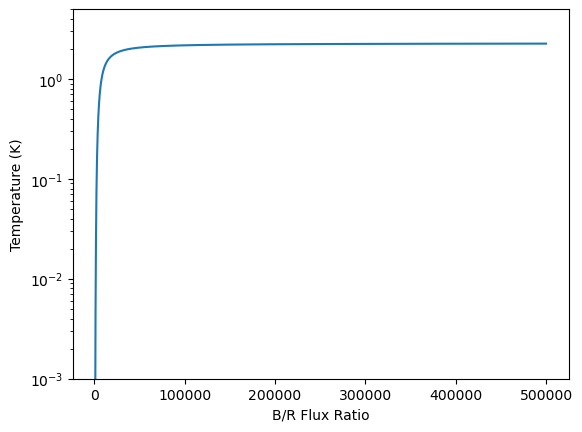

In [ ]:

# Create an array of temperatures

T_max = 5.e5
T_min = 1000
T_arr = np.logspace(np.log10(T_min),np.log10(T_max),10000)


# Find the emissivity in each band, as a function of temperature:

I_nu_G = 2*h/cl**2 * nu_G**3 / (np.exp(h*nu_G/(k*T_arr))-1)
I_nu_B = 2*h/cl**2 * nu_B**3 / (np.exp(h*nu_B/(k*T_arr))-1)
I_nu_R = 2*h/cl**2 * nu_R**3 / (np.exp(h*nu_R/(k*T_arr))-1)


# Plot B/R flux ratio as a function of temperature

plt.plot(T_arr,I_nu_B/I_nu_R)
plt.yscale('log')
plt.ylim(1.e-3,5.)
plt.xlabel('Temperature (K)')
plt.ylabel('Luminosity')
plt.show()


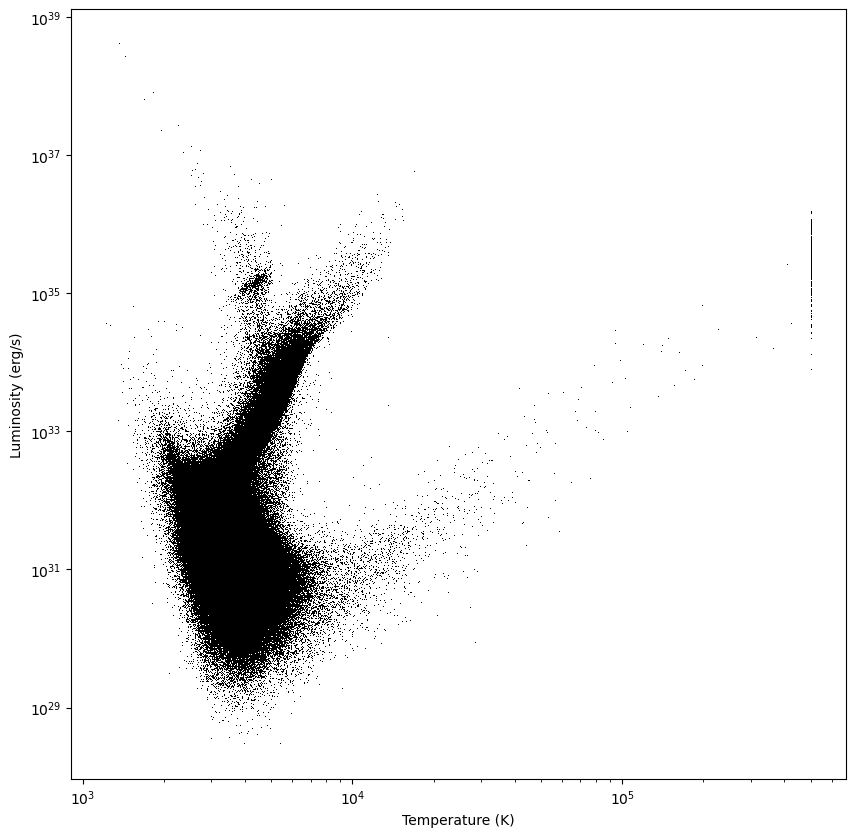

In [103]:

# Interpolate to find the temperature for each B/R flux ratio observation:
T = np.interp(F_B_over_F_R, I_nu_B/I_nu_R, T_arr)

# Ensure T and L have the same shape
min_length = min(len(T), len(L))
T = T[:min_length]
L = L[:min_length]

fig, ax = plt.subplots(figsize=(10, 10))
#h = ax.hist2d(T,L, bins=300, cmin=10, norm=colors.PowerNorm(0.5), zorder=0.5)
#fig, ax = plt.subplots(figsize=(10,5))
#cb = fig.colorbar(h[3], ax=ax, pad=0.02)
ax.plot(T, L, 'k,')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('Temperature (K)')
ax.set_ylabel('Luminosity (erg/s)')
plt.show()

O Star: 0.05%
B Star: 0.15%
A Star: 0.23%
F Star: 1.03%
G Star: 3.25%
K Star: 32.15%
M Star: 62.77%
L Star: 0.37%
T Star: 0.00%
Y Star: 0.00%


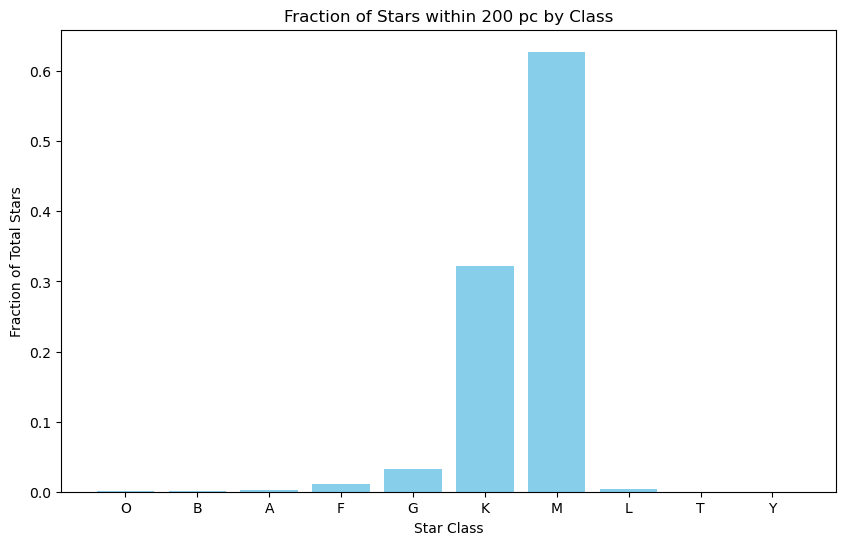

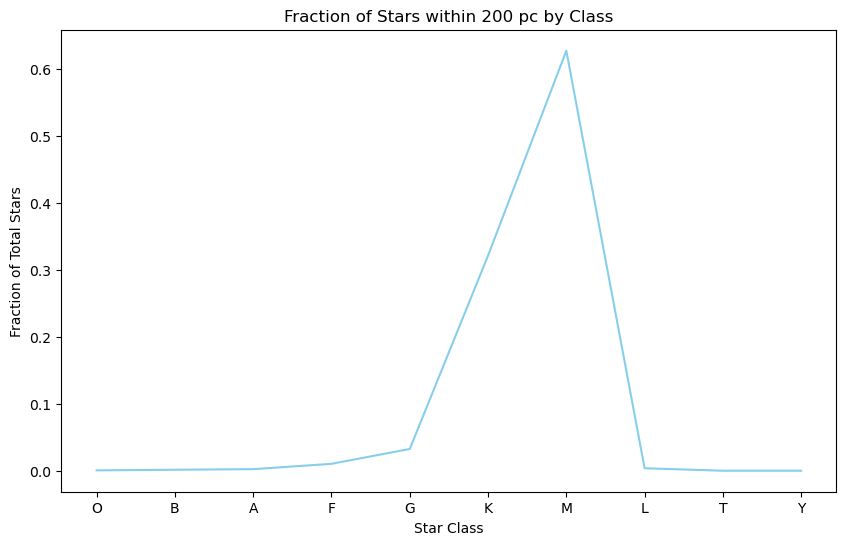

In [105]:
total_stars = T.size

fractions = {
    'O': O_star_index.shape[0] / total_stars,
    'B': B_star_index.shape[0] / total_stars,
    'A': A_star_index.shape[0] / total_stars,
    'F': F_star_index.shape[0] / total_stars,
    'G': G_star_index.shape[0] / total_stars,
    'K': K_star_index.shape[0] / total_stars,
    'M': M_star_index.shape[0] / total_stars,
    'L': L_star_index.shape[0] / total_stars,
    'T': T_star_index.shape[0] / total_stars,
    'Y': Y_star_index.shape[0] / total_stars
}

# Print fractions
for star_class, fraction in fractions.items():
    print(f"{star_class} Star: {fraction * 100:.2f}%")

# Plotting the fractions
classes = list(fractions.keys())
values = list(fractions.values())

plt.figure(figsize=(10, 6))
plt.bar(classes, values, color='skyblue')
#plt.plot(classes, values, color='skyblue')
plt.xlabel('Star Class')
plt.ylabel('Fraction of Total Stars')
plt.title('Fraction of Stars within 200 pc by Class')
plt.show()
plt.figure(figsize=(10, 6))
plt.plot(classes, values, color='skyblue')
plt.xlabel('Star Class')
plt.ylabel('Fraction of Total Stars')
plt.title('Fraction of Stars within 200 pc by Class')
plt.show()